# Interface Analysis with Arpeggio
**Author**:Diego Acosta
**Laboratory**: Molecular Dynamics in Cancer Disease
**Date**: Agosto 2025
**Version**: 1.1

## Overview of the Notebook
This notebook provides an analysis of the interactions between a receptor (chain A) and its ligand (chain B), focusing on various types of interactions. Three key visualizations are provided:

#### Residue Interaction Visualization (Receptor-Ligand)
This plot visualizes the interactions at the residue level between the receptor (chain A) and the ligand (chain B). The plot highlights how individual residues in the receptor interact with residues in the ligand, providing insights into the binding interface. This is crucial for understanding the molecular basis of receptor-ligand recognition and binding affinity.

#### Atom Interaction Visualization
This plot zooms in on the atomic interactions between the receptor and the ligand, showing the specific atoms involved in the binding interface. It offers a more detailed look at the interactions, including hydrogen bonds, hydrophobic contacts, and other atomic-level interactions that contribute to the binding process. This visualization is valuable for understanding the fine-tuned molecular interactions that drive binding.



#### SASA Visualization (Ligand Perspective) (experimental)
The third plot provides a solvent-accessible surface area (SASA) analysis from the ligand's perspective. This plot specifically highlights the residues in the ligand that interact with the receptor, indicating how much of the ligand’s surface is accessible to solvent and how it changes during binding. The plot also helps identify key residues that may play a critical role in the binding interaction, which can be valuable for drug design or further molecular dynamics studies.

\
These visualizations aim to provide a comprehensive overview of the molecular interactions between the receptor and the ligand, helping researchers gain a better understanding of the binding mechanism and potential areas for therapeutic intervention.

In [4]:
# dependendes
#!conda install conda-forge::pymol-open-source -y
#!pip install gemmi
#!pip install pdbe-arpeggio

In [116]:
######### INPUT DATA ###########
'''
#PLI
MBII-ethoxysanguinarine: 10
MBIII-ethoxysanguinarine: 17
MBIIyIII-ethoxysanguinarine: 190

MBII-withaferin_A: 167
MBIII-withaferin_A: 12
MBIIyIII-withaferin_A: 182

#PPI
P01106-Q9BZ95_MBII: 95
P01106-Q9BZ95_MBIII: 99
P01106-Q9BZ95_MBIIyIII: 82
'''
state = 'P01106-Q9BZ95_MBIII' # modificar al usar
model_num = 99
pdb_path = f'../frames/{state}_frame_{model_num}.pdb'
data_path = f'../data/{state}/'


# aux
just in case you have a pdb with a merged chain

In [117]:
from Bio import PDB
from Bio.PDB.Polypeptide import PPBuilder

def get_pdb_chains_and_sequences(pdb_file):
    parser = PDB.PDBParser(QUIET=True)
    structure = parser.get_structure("protein", pdb_file)
    ppb = PPBuilder()
    chains_dict = {}
    
    # Iterate over all models and chains in the structure
    for model in structure:
        for chain in model:
            # Build polypeptides from the chain; some chains may have more than one fragment.
            peptides = ppb.build_peptides(chain)
            # Join all fragments (if there are multiple) into a single sequence.
            seq = ''.join(str(pp.get_sequence()) for pp in peptides)
            chains_dict[chain.id] = seq

    return chains_dict

# Replace 'pdb' with your pdb filename (e.g., "1abc.pdb")
chains_and_seqs = get_pdb_chains_and_sequences(pdb_path)
print("Chains and their sequences:")
for chain_id in sorted(chains_and_seqs.keys()):
    print(f"Chain {chain_id}: {chains_and_seqs[chain_id]}")


Chains and their sequences:
Chain A: ARKDSGSPNPARGHSVCSTSSLYLQDLSAAASECIDPSVVFPYPLNDSSSPKSCASQDSSAFSPSSDSLLSSTESSPQGSPEPLVLHEETPPTTSSDSEEEQEDEEEIDVVSVEKRQAPGKRSESGSPSA
Chain B: MDFSFSFMQGIMGNTIQQPPQLIDSANIRQEDAFDNNSDIAEDGGQTPYEATLQQGFQYPATTEDLPPLTNGYPSSISVYETQTKYQSYNQYPNGSANGFGAVRNFSPTDYYHSEIPNTRPHEILEKPSPPQPPPPPSVPQTVIPKKTGSPEIKLKITKTIQNGRELFESSLCGDLLNEVQASEHTKSKHESRKEKRKKSNKHDSSRSEERKSHKIPKLEPEEQNRPNERVDTVSEKPREEPVLKEEAPVQPILSSVPTTEVSTGVKFQVGDLVWSKVGTYPWWPCMVSSDPQLEVHTKINTRGAREYHVQFFSNQPERAWVHEKRVREYKGHKQYEELLAEATKQASNHSEKQKIRKPRPQRERAQWDIGIAHAEKALKMTREERIEQYTFIYIDKQPEEALSQAKKSVASKTEVKKTRRPRSVLNTQPEQTNAGEVASSLSSTEIRRHSQRRHTSAEEEEPPPVKIAWKTAAARKSLPASITMHKGSLDLQKCNMSPVVKIEQVFALQNATGDGKFIDQFVYSTKGIGNKTEISVRGQDRLIISTPNQRNEKPTQSVSSPEATSGSTGSVEKKQQRRSIRTRSESEKSTEVVPKKKIKKEQVETVPQATVKTGLQKGSADRGVQGSVRFSDSSVSAAIEETVD


In [120]:
from Bio import PDB

def renumber_chain(pdb_file, out_file, target_chain='A', start_num=170):
    parser = PDB.PDBParser(QUIET=True)
    structure = parser.get_structure("protein", pdb_file)

    # Iterate over models and chains in the structure
    for model in structure:
        for chain in model:
            if chain.id == target_chain:
                new_seq = start_num
                # Loop over residues in the target chain
                for res in chain.get_residues():
                    # Each residue id is a tuple: (hetfield, resseq, icode)
                    old_id = res.id
                    # Build a new id using new_seq for the residue number, keep hetfield and insertion code
                    new_id = (old_id[0], new_seq, old_id[2])
                    res.id = new_id
                    new_seq += 1

    # Save the modified structure to a new PDB file
    io = PDB.PDBIO()
    io.set_structure(structure)
    io.save(out_file)
    
# Example usage:
renumber_chain(pdb_path, pdb_path)




/home/dacoya/miniconda3/envs/anal/lib/python3.11/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 170, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 100, ' ')` to `(' ', 170, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/home/dacoya/miniconda3/envs/anal/lib/python3.11/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 171, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 101, ' ')` to `(' ', 171, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/home/dacoya/miniconda3/envs/anal/lib/python3.11/site-packages/Bio/PDB/Entity.py:197: BiopythonWarning: The id `(' ', 172, ' ')` is already used for a sibling of this entity. Changing id from `(' ', 102, ' ')` to `(' ', 172, ' ')` might create access inconsistencies to children of the parent entity.
  warnings.warn(
/home/dacoya/miniconda3/envs/anal/lib/python3.

In [121]:
# read chains
from Bio import PDB

def get_pdb_chains(pdb_file):
    parser = PDB.PDBParser(QUIET=True)
    structure = parser.get_structure("protein", pdb_file)

    chains = set()
    for model in structure:
        for chain in model:
            chains.add(chain.id)

    return sorted(chains)

chains = get_pdb_chains(pdb_path)
print("Chains in the PDB:", chains)

Chains in the PDB: ['A', 'B']


# Functions

In [122]:
chains[0]

'A'

In [123]:
import subprocess
import os

def run_arpeggio(pdb_file, shortest_chain, output_dir=data_path):

    cif_file = pdb_file.replace(".pdb", ".cif")  # Generate mmCIF filename
    json_file = os.path.join(output_dir, os.path.basename(pdb_file).replace(".pdb", ".json"))  

    # Check if the JSON file already exists
    if os.path.exists(json_file):
        print(f"Skipping Arpeggio: JSON file already exists -> {json_file}")
        return json_file  # Return existing JSON file

    try:
        # Convert PDB to mmCIF
        subprocess.run(
            ["gemmi", "convert", "--from=pdb", "--to=mmcif", pdb_file, cif_file, "--verbose"], 
            check=True
        )
        print(f"Successfully converted {pdb_file} to {cif_file}")

        # Run PDBe-Arpeggio
        subprocess.run(
            ["pdbe-arpeggio", cif_file, "-o", output_dir, "-s", f"/{shortest_chain}//"], 
            check=True
        )
        print(f"Arpeggio analysis completed. Results saved in {output_dir}")

        # Construct the expected JSON file path
        json_file = os.path.join(output_dir, os.path.basename(pdb_file).replace(".pdb", ".json"))  

        return json_file

    except subprocess.CalledProcessError as e:
        print(f"Error: {e}")
        return None  # Return None if there's an error

json_path = run_arpeggio(pdb_path, chains[0])

#You should use these command-line from terminal, sometimes it has some issue by using directly in jupyter-notebook

Converting ../frames/P01106-Q9BZ95_MBIII_frame_99.pdb to mmcif...
Done.


Successfully converted ../frames/P01106-Q9BZ95_MBIII_frame_99.pdb to ../frames/P01106-Q9BZ95_MBIII_frame_99.cif


INFO//16:48:09.034//Program begin.
INFO//16:48:09.034//Selection perceived: ['/A//']
DEBUG//16:48:09.099//Loaded PDB structure (BioPython)
*** Open Babel Warning  in PerceiveBondOrders
  Failed to kekulize aromatic bonds in OBMol::PerceiveBondOrders

DEBUG//16:48:12.913//Loaded MMCIF structure (OpenBabel)
DEBUG//16:48:12.927//Mapped OB to BioPython atoms and vice-versa.
DEBUG//16:48:16.845//Added hydrogens.
DEBUG//16:48:21.651//Determined atom explicit and implicit valences, bond orders, atomic numbers, formal charge and number of bound hydrogens.
DEBUG//16:48:21.694//Initialised SIFts.
DEBUG//16:48:21.700//Determined polypeptide residues, chain breaks, termini
DEBUG//16:48:21.700//Percieved and stored rings.
DEBUG//16:48:21.704//Perceived and stored amide groups.
DEBUG//16:48:21.710//Added hydrogens to BioPython atoms.
DEBUG//16:48:21.717//Added VdW radii.
DEBUG//16:48:21.723//Added covalent radii.
DEBUG//16:48:21.730//Completed NeighborSearch.
DEBUG//16:48:21.730//Assigned rings to r

Arpeggio analysis completed. Results saved in ../data/P01106-Q9BZ95_MBIII/


INFO//16:48:37.692//Program End. Maximum memory usage was 3246.95 MB.


In [124]:
json_path

'../data/P01106-Q9BZ95_MBIII/P01106-Q9BZ95_MBIII_frame_99.json'

# GET DF

In [125]:
def get_df(json_path, chains, state):
    # Define the interaction types to create columns for
    import json
    import pandas as pd
    # If you already have a JSON file saved locally:
    with open(f"{json_path}", "r") as f:
        data = json.load(f)
        
    # Flatten the JSON structure
    df = pd.json_normalize(data)
    
    interaction_types = [
        "clash", "covalent", "vdw_clash", "vdw", "proximal", "hbond",
        "weak_hbond", "xbond", "ionic", "metal",
        "aromatic", "hydrophobic", "carbonyl", "polar", "weak_polar"]
    
    # Create new columns, marking 1 if the interaction is present in the contact list, else 0.
    for interaction in interaction_types:
        df[interaction] = df['contact'].apply(lambda x: 1 if interaction in x else 0)
        
    # Creating the new columns based on the required format
    df['atom_bgn'] = df['bgn.auth_seq_id'].astype(str) + "/" + df['bgn.auth_atom_id']
    df['atom_bgn_name'] = df['bgn.auth_seq_id'].astype(str) + "/" + df['bgn.label_comp_id'] + "/" + df['bgn.auth_atom_id']
    
    df['atom_end'] = df['end.auth_seq_id'].astype(str) + "/" + df['end.auth_atom_id']
    df['atom_end_name'] = df['end.auth_seq_id'].astype(str) + "/" + df['end.label_comp_id'] + "/" + df['end.auth_atom_id']
    
    df['res_bgn_name'] = df['bgn.auth_seq_id'].astype(str) + "/" + df['bgn.label_comp_id']
    df['res_end_name'] = df['end.auth_seq_id'].astype(str) + "/" + df['end.label_comp_id']

    # Filter to keep only 'atom-atom' in the 'type' column
    df_filtered = df[df['type'] == 'atom-atom'].copy()
    
    # Reset index if needed
    df_filtered.reset_index(drop=True, inplace=True)

    #keep only interaction between chains
    df_chainAB = df_filtered[
        (df_filtered["bgn.auth_asym_id"] == f"{chains[0]}") & 
        (df_filtered["end.auth_asym_id"] == f"{chains[1]}")
    ].copy()
    
    df_chainAB.reset_index(drop=True, inplace=True)
    df_chainAB.to_csv(f'{data_path}/df_unsorted_{state}.csv')
    

    return df_chainAB

df_chainAB = get_df(json_path, chains, state)
df_chainAB

,contact,distance,interacting_entities,type,bgn.auth_asym_id,bgn.auth_atom_id,bgn.auth_seq_id,bgn.label_comp_id,bgn.label_comp_type,bgn.pdbx_PDB_ins_code,...,hydrophobic,carbonyl,polar,weak_polar,atom_bgn,atom_bgn_name,atom_end,atom_end_name,res_bgn_name,res_end_name
0,[proximal],4.58,INTER,atom-atom,A,CB,180,ALA,M,,...,0,0,0,0,180/CB,180/ALA/CB,270/CG2,270/VAL/CG2,180/ALA,270/VAL
1,[vdw_clash],3.09,INTER,atom-atom,A,CB,180,ALA,M,,...,0,0,0,0,180/CB,180/ALA/CB,290/CB,290/SER/CB,180/ALA,290/SER
2,[vdw_clash],3.04,INTER,atom-atom,A,CB,180,ALA,M,,...,0,0,0,0,180/CB,180/ALA/CB,290/N,290/SER/N,180/ALA,290/SER
3,"[proximal, hydrophobic]",3.68,INTER,atom-atom,A,CB,180,ALA,M,,...,1,0,0,0,180/CB,180/ALA/CB,270/CG1,270/VAL/CG1,180/ALA,270/VAL
4,[vdw_clash],2.59,INTER,atom-atom,A,CD,181,ARG,M,,...,0,0,0,0,181/CD,181/ARG/CD,387/C,387/ILE/C,181/ARG,387/ILE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5380,"[proximal, hydrophobic]",3.95,INTER,atom-atom,A,CG2,242,THR,M,,...,1,0,0,0,242/CG2,242/THR/CG2,414/CG2,414/THR/CG2,242/THR,414/THR
5381,"[vdw_clash, weak_polar]",2.42,INTER,atom-atom,A,CG2,242,THR,M,,...,0,0,0,1,242/CG2,242/THR/CG2,459/OE2,459/GLU/OE2,242/THR,459/GLU
5382,[vdw_clash],3.28,INTER,atom-atom,A,CG2,242,THR,M,,...,0,0,0,0,242/CG2,242/THR/CG2,475/CA,475/ALA/CA,242/THR,475/ALA
5383,[vdw],3.33,INTER,atom-atom,A,CG2,242,THR,M,,...,0,0,0,0,242/CG2,242/THR/CG2,475/N,475/ALA/N,242/THR,475/ALA


# RESIDUE INTERACTION PLOT

Number of beginning nodes: 158
Number of ending nodes: 124


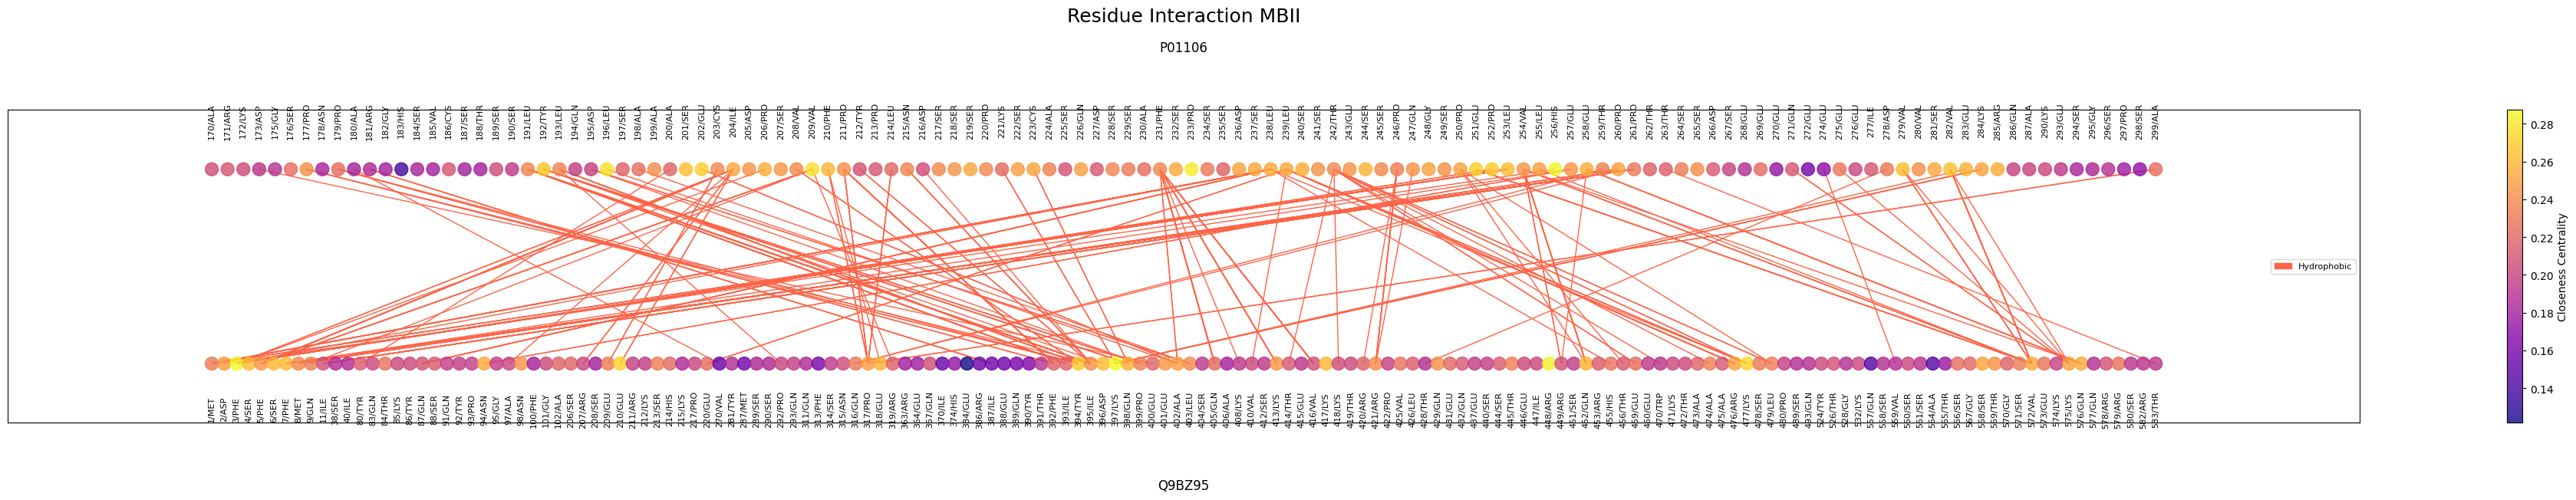

In [129]:
def plot2interaction_res(df, state, chains, distance_max=5):
    """
    Plot residue-residue interactions between two chains from an interaction DataFrame.
    
    Parameters:
    - df: pandas DataFrame containing interaction data.
    - pdb: string, PDB filename used for naming output plot.
    - chains: list/tuple with two chain identifiers (e.g., ['A', 'B']).
    - distance_max: float, maximum distance to consider for interaction edges.
    
    The function uses NetworkX to create a bipartite graph where nodes represent residues and 
    edges represent interactions (weighted by 'proximal' score).
    """
    import networkx as nx
    import matplotlib.pyplot as plt
    import numpy as np
    import matplotlib.colors as mcolors
    import matplotlib.patches as mpatches
    import pandas as pd
    from matplotlib import font_manager

    # Group by residue pairs and extract the 'proximal' weight for edges
    residue_pairs = df.groupby(["res_bgn_name", "res_end_name"]).sum().index.tolist()
    proximal_weights = df.groupby(["res_bgn_name", "res_end_name"]).sum()["proximal"].tolist()
    edges_tuples = [(bgn, end, weight) for (bgn, end), weight in zip(residue_pairs, proximal_weights)]
    
    # Get unique residue nodes for both sides, sorted by residue sequence number 
    #CAMBIAR EN CASO DE SER NECESARIO VOLTEAR L
    nodes_bgn = sorted(df.groupby(["res_end_name"]).sum().index.tolist(), 
                        key=lambda x: int(x.split('/')[0]))
    nodes_end = sorted(df.groupby(["res_bgn_name"]).sum().index.tolist(), 
                        key=lambda x: int(x.split('/')[0]))
    
    # Print node counts (for debugging)
    print('Number of beginning nodes:', len(nodes_bgn))
    print('Number of ending nodes:', len(nodes_end))
    if len(nodes_bgn) == 0 or len(nodes_end) == 0:
        print("No nodes to plot.")
        return

    # Helper to extract edges for a given interaction type within the distance threshold.
    def extract_edges(interaction_col):
        return list(
            df.loc[(df[interaction_col] > 0) & (df["distance"] < distance_max), 
                   ["res_bgn_name", "res_end_name"]].itertuples(index=False, name=None)
        )
    edge_saltbridge = list(
        df[["res_bgn_name", "res_end_name"]]
        .loc[(df["ionic"] > 0) & (df["hbond"] > 0)]
        .loc[df["distance"] < distance_max]
        .itertuples(index=False, name=None)
    )
    
    # Define interaction types with desired colors and corresponding extraction
    edge_types = {
        #Van der Waals": ("dimgray", extract_edges("vdw")),  # Stronger blue
        "Hydrophobic": ("tomato", extract_edges("hydrophobic")),  # Intense red-orange
        #"Ionic": ("black", extract_edges("ionic")),  # Strong orange
        #"Polar": ("royalblue", extract_edges("polar")),  # Deep blue
        #"Hydrogen Bond": ("limegreen", extract_edges("hbond")),  # Vivid green
        #"Aromatic": ("darkviolet", extract_edges("aromatic")),  # Bold purple
        #"Salt Bridge": ("black", edge_saltbridge),  
        # Uncomment and add more if needed:
        #"Weak H-Bond": ("forestgreen", extract_edges("weak_hbond")),  # Darker green
        #"X-Bond": ("deepskyblue", extract_edges("xbond")),  # Bright cyan
        #"Metal": ("goldenrod", extract_edges("metal")),  # Darker gold
        #"Carbonyl": ("saddlebrown", extract_edges("carbonyl")),  # Strong brown
        #"Weak Polar": ("cadetblue", extract_edges("weak_polar")),  # Muted blue-green
        #"Clash": ("black", extract_edges("clash")),  
        #"Covalent": ("indigo", extract_edges("covalent")),  # Deep purple
        #"VDW Clash": ("dodgerblue", extract_edges("vdw_clash")),  # Dark gray
    }

    
    # Build the NetworkX graph and add nodes and weighted edges
    FG = nx.Graph()
    FG.add_nodes_from(nodes_bgn, bipartite=0)
    FG.add_nodes_from(nodes_end, bipartite=1)
    FG.add_weighted_edges_from(edges_tuples)
    
    # Use bipartite layout: nodes_bgn on top, nodes_end on bottom.
    pos = nx.bipartite_layout(FG, nodes_bgn, align='horizontal', scale=1.5, aspect_ratio=0.1) #scale es cuanto se apreta verticalmente, aspect_radio es cuanto se apreta horizontalmente
    
    # Adjust figure size based on number of nodes
    fig_width = max(len(nodes_end) / 1.1, 10)
    fig_height = max(len(nodes_bgn) / 15, 12)
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))
    margin = 0.33
    fig.subplots_adjust(margin, margin, 1 - margin, 1 - margin)
    ax.axis('equal')
    
    # Compute a centrality measure for coloring nodes (using closeness centrality here)
    centrality = nx.closeness_centrality(FG)
    nodes_draw = nx.draw_networkx_nodes(FG, pos,
                                        nodelist=list(centrality.keys()),
                                        cmap=plt.cm.plasma,
                                        node_color=list(centrality.values()),
                                        node_size=150,
                                        alpha=0.8)
    plt.colorbar(nodes_draw, label='Closeness Centrality')
    
    # Draw edges for each interaction type (only if edges exist)
    for interaction, (color, edgelist) in edge_types.items():
        if edgelist:  
            nx.draw_networkx_edges(FG, pos, edgelist=edgelist, width=1, alpha=1, edge_color=color)
    
    # Add labels for nodes from both sets
    labels_bgn = {node: node for node in nodes_bgn}
    labels_end = {node: node for node in nodes_end}
    
    # Combine labels for all nodes
    labels = {node: node for node in nodes_bgn + nodes_end}
    
    # Draw labels for all nodes
    node_labels = nx.draw_networkx_labels(FG, pos, labels, font_size=8, font_family="sans-serif")
    
    # Offset labels to prevent overlap and rotate for readability
    for node, text_obj in node_labels.items():
        posx, posy = pos[node]
        if node in nodes_bgn:
            text_obj.set_position((posx, posy - 0.07))  # Offset for nodes_bgn
        else:
            text_obj.set_position((posx, posy + 0.075))  # Offset for nodes_end
        text_obj.set_rotation(90)
        text_obj.set_clip_on(False)
    
    # Set font properties for tick labels
    sizeOfFont = 8
    ticks_font = font_manager.FontProperties(family='monospace', style='normal',
                                               size=sizeOfFont, weight='normal')
    for label in ax.get_xticklabels():
        label.set_fontproperties(ticks_font)
    
    # Add legend
    legend_handles = [
        mpatches.Patch(color=color, label=interaction)
        for interaction, (color, edgelist) in edge_types.items() if edgelist
    ]
    ax.legend(handles=legend_handles, loc='center right', fontsize=8)
    
    # Add titles and chain information
    ax.text(0.5, 1.30, "Residue Interaction MBII", fontsize=18, 
            ha='center', va='center', transform=ax.transAxes)
    ax.text(0.5, 1.20, f"{state[:6]}", fontsize=12, 
            ha='center', va='center', transform=ax.transAxes)
    ax.text(0.5, -0.20, f"{state[7:13]}", fontsize=12, 
            ha='center', va='center', transform=ax.transAxes)
    
    # Save and display the plot
    plt
    plt.savefig(f'{data_path}/res_interaction_{state}hid.png', bbox_inches='tight', dpi=300)
    plt.show()

plot2interaction_res(df_chainAB, state, chains)



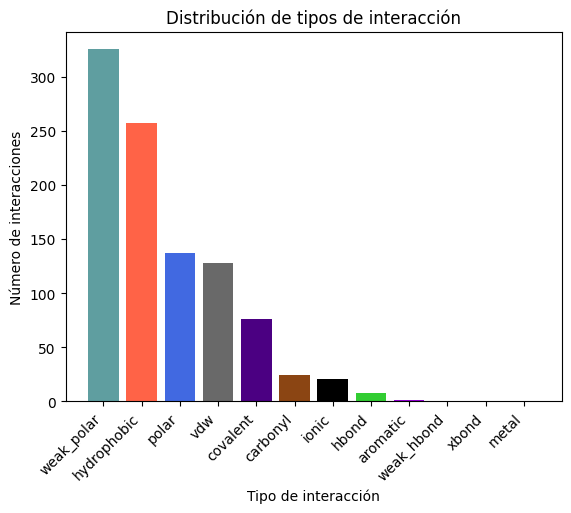

In [130]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el CSV
df = pd.read_csv(f"{data_path}df_unsorted_{state}.csv")

# Lista completa de interacciones (sin 'proximal')
cols_interacciones = [
    "covalent", "vdw",
    "hbond", "weak_hbond", "xbond", "ionic", "metal",
    "aromatic", "hydrophobic", "carbonyl", "polar", "weak_polar"
]


# Colores según tu diccionario edge_types
colores_dict = {
    "vdw": "dimgray",
    "hydrophobic": "tomato",
    "ionic": "black",
    "polar": "royalblue",
    "hbond": "limegreen",
    "aromatic": "darkviolet",
    "weak_hbond": "forestgreen",
    "xbond": "deepskyblue",
    "metal": "goldenrod",
    "carbonyl": "saddlebrown",
    "weak_polar": "cadetblue",
    "covalent": "indigo",
}

# Contar interacciones (si alguna columna falta, rellena con 0)
conteo = df.reindex(columns=cols_interacciones, fill_value=0).sum()

# Ordenar de mayor a menor
conteo = conteo.sort_values(ascending=False)

# Asignar colores en el mismo orden que el conteo
colores = [colores_dict[inter] for inter in conteo.index]

# Crear gráfico de barras
plt.bar(conteo.index, conteo.values, color=colores)

plt.title("Distribución de tipos de interacción")
plt.ylabel("Número de interacciones")
plt.xlabel("Tipo de interacción")
plt.xticks(rotation=45, ha="right")
plt.savefig(f'{data_path}/interaction_frequency{state}.png', bbox_inches='tight', dpi=300)
plt.show()




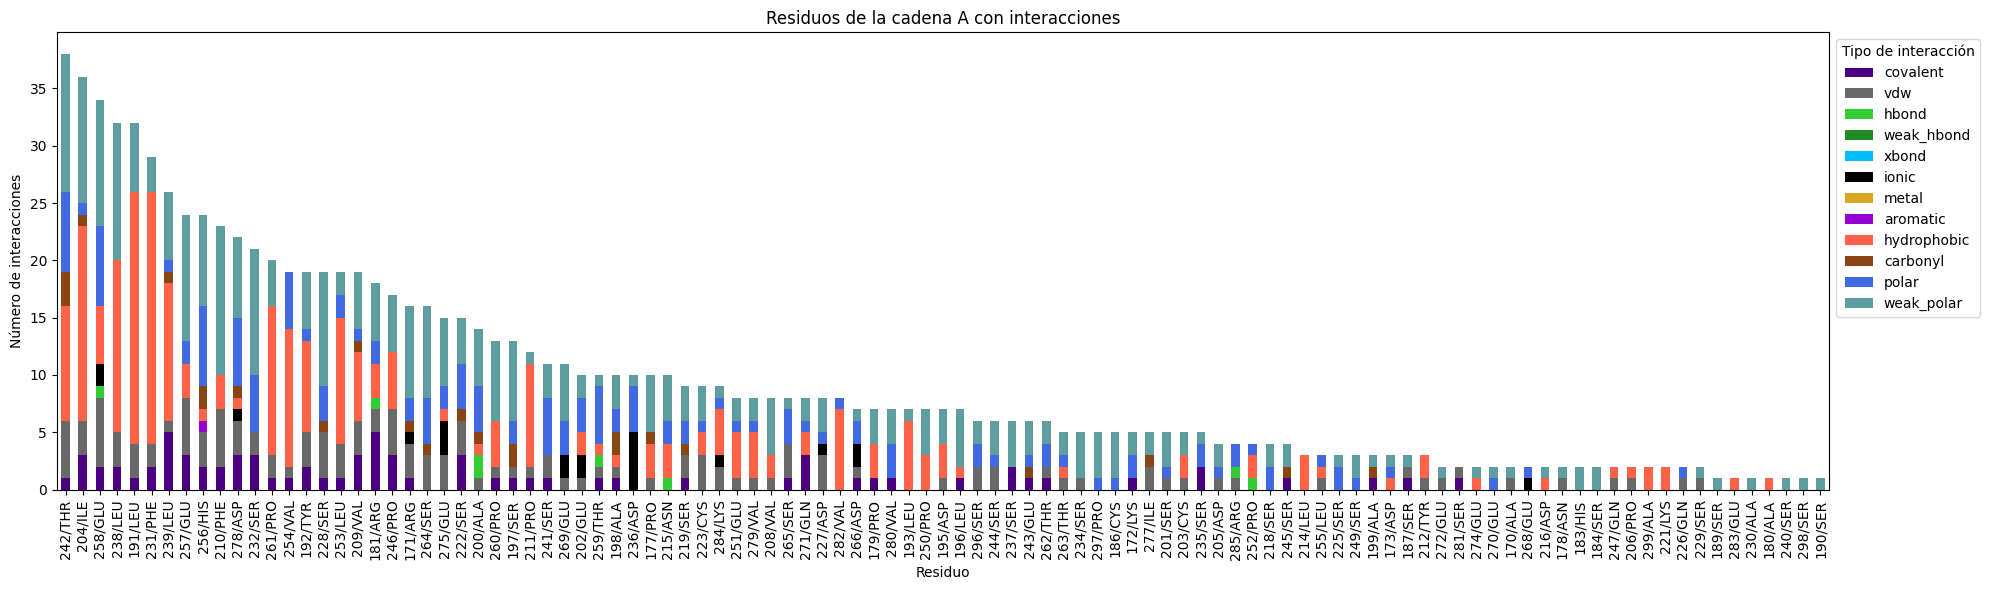

In [131]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar el CSV
df = pd.read_csv(f"{data_path}df_unsorted_{state}.csv")

# Lista de interacciones de interés (sin proximal)
cols_interacciones = [
    "covalent", "vdw", "hbond", "weak_hbond",
    "xbond", "ionic", "metal", "aromatic", "hydrophobic",
    "carbonyl", "polar", "weak_polar"
]

# Colores para cada interacción (del diccionario edge_types)
colores_dict = {
    "vdw": "dimgray",
    "hydrophobic": "tomato",
    "ionic": "black",
    "polar": "royalblue",
    "hbond": "limegreen",
    "aromatic": "darkviolet",
    "weak_hbond": "forestgreen",
    "xbond": "deepskyblue",
    "metal": "goldenrod",
    "carbonyl": "saddlebrown",
    "weak_polar": "cadetblue",
    "covalent": "indigo",
}

# Filtrar solo cadena A
df_A = df[df["bgn.auth_asym_id"] == "A"]

# Agrupar por residuo (ej: "288_PRO")
df_A["residuo"] = df_A["res_bgn_name"]

# Sumar las interacciones por residuo
conteo_residuos = df_A.groupby("residuo")[cols_interacciones].sum()

# Quitar los residuos que no tienen ninguna interacción
conteo_residuos = conteo_residuos[(conteo_residuos > 0).any(axis=1)]

# Ordenar por número total de interacciones (descendente)
conteo_residuos["total"] = conteo_residuos.sum(axis=1)
conteo_residuos = conteo_residuos.sort_values("total", ascending=False).drop(columns="total")

# --- Graficar ---
ax = conteo_residuos.plot(
    kind="bar",
    stacked=True,
    figsize=(20, 6),
    color=[colores_dict[c] for c in conteo_residuos.columns]
)

plt.title("Residuos de la cadena A con interacciones")
plt.ylabel("Número de interacciones")
plt.xlabel("Residuo")
plt.xticks(rotation=90)
plt.legend(title="Tipo de interacción", bbox_to_anchor=(1, 1), loc='upper left')
plt.tight_layout()
plt.savefig(f'{data_path}/interaction_per_residue_{state}_unordered.png', bbox_inches='tight', dpi=300)
plt.show()



# Atomic Interaction between chains

In [54]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
from matplotlib import rc, font_manager
import matplotlib.patches as mpatches


def plot2interaction_atom(df, state, chains, distance_max=5):
    """
    Plot residue-residue interactions between two chains from an interaction DataFrame.
    
    Parameters:
    - df: pandas DataFrame containing interaction data.
    - pdb: string, PDB filename used for naming output plot.
    - chains: list/tuple with two chain identifiers (e.g., ['A', 'B']).
    - distance_max: float, maximum distance to consider for interaction edges.
    
    The function uses NetworkX to create a bipartite graph where nodes represent residues and 
    edges represent interactions (weighted by 'proximal' score).
    """
    import networkx as nx
    import matplotlib.pyplot as plt
    import numpy as np
    import matplotlib.colors as mcolors
    import matplotlib.patches as mpatches
    import pandas as pd
    from matplotlib import font_manager

    # Group by residue pairs and extract the 'proximal' weight for edges
    residue_pairs = df.groupby(["atom_bgn_name", "atom_end_name"]).sum().index.tolist()
    proximal_weights = df.groupby(["atom_bgn_name", "atom_end_name"]).sum()["proximal"].tolist()
    edges_tuples = [(bgn, end, weight) for (bgn, end), weight in zip(residue_pairs, proximal_weights)]
    
    # Get unique residue nodes for both sides, sorted by residue sequence number 
    #CAMBIAR EN CASO DE SER NECESARIO VOLTEAR L
    nodes_bgn = sorted(df.groupby(["atom_end_name"]).sum().index.tolist(), 
                        key=lambda x: int(x.split('/')[0]))
    nodes_end = sorted(df.groupby(["atom_bgn_name"]).sum().index.tolist(), 
                        key=lambda x: int(x.split('/')[0]))
    
    # Print node counts (for debugging)
    print('Number of beginning nodes:', len(nodes_bgn))
    print('Number of ending nodes:', len(nodes_end))
    if len(nodes_bgn) == 0 or len(nodes_end) == 0:
        print("No nodes to plot.")
        return

    # Helper to extract edges for a given interaction type within the distance threshold.
    def extract_edges(interaction_col):
        return list(
            df.loc[(df[interaction_col] > 0) & (df["distance"] < distance_max), 
                   ["atom_bgn_name", "atom_end_name"]].itertuples(index=False, name=None)
        )
    edge_saltbridge = list(
        df[["atom_bgn_name", "atom_end_name"]]
        .loc[(df["ionic"] > 0) & (df["hbond"] > 0)]
        .loc[df["distance"] < distance_max]
        .itertuples(index=False, name=None)
    )
    
    # Define interaction types with desired colors and corresponding extraction
    edge_types = {
        "Van der Waals": ("dimgray", extract_edges("vdw")),  # Stronger blue
        "Hydrophobic": ("tomato", extract_edges("hydrophobic")),  # Intense red-orange
        "Ionic": ("darkorange", extract_edges("ionic")),  # Strong orange
        "Polar": ("royalblue", extract_edges("polar")),  # Deep blue
        "Hydrogen Bond": ("limegreen", extract_edges("hbond")),  # Vivid green
        "Aromatic": ("darkviolet", extract_edges("aromatic")),  # Bold purple
        "Salt Bridge": ("black", edge_saltbridge),  
        # Uncomment and add more if needed:
        "Weak H-Bond": ("forestgreen", extract_edges("weak_hbond")),  # Darker green
        "X-Bond": ("deepskyblue", extract_edges("xbond")),  # Bright cyan
        "Metal": ("goldenrod", extract_edges("metal")),  # Darker gold
        "Carbonyl": ("saddlebrown", extract_edges("carbonyl")),  # Strong brown
        "Weak Polar": ("cadetblue", extract_edges("weak_polar")),  # Muted blue-green
        "Clash": ("black", extract_edges("clash")),  
        "Covalent": ("indigo", extract_edges("covalent")),  # Deep purple
        #"VDW Clash": ("dodgerblue", extract_edges("vdw_clash")),  # Dark gray
    }

    
    # Build the NetworkX graph and add nodes and weighted edges
    FG = nx.Graph()
    FG.add_nodes_from(nodes_bgn, bipartite=0)
    FG.add_nodes_from(nodes_end, bipartite=1)
    FG.add_weighted_edges_from(edges_tuples)
    
    # Use bipartite layout: nodes_bgn on top, nodes_end on bottom.
    pos = nx.bipartite_layout(FG, nodes_bgn, align='horizontal', scale=0.5, aspect_ratio=0.1)
    
    # Adjust figure size based on number of nodes
    fig_width = max(len(nodes_end) / 1, 10)
    fig_height = max(len(nodes_bgn) / 10, 4)
    fig, ax = plt.subplots(figsize=(fig_width, fig_height))
    margin = 0.33
    fig.subplots_adjust(margin, margin, 1 - margin, 1 - margin)
    ax.axis('equal')
    
    # Compute a centrality measure for coloring nodes (using closeness centrality here)
    centrality = nx.closeness_centrality(FG)
    nodes_draw = nx.draw_networkx_nodes(FG, pos,
                                        nodelist=list(centrality.keys()),
                                        cmap=plt.cm.plasma,
                                        node_color=list(centrality.values()),
                                        node_size=150,
                                        alpha=0.8)
    plt.colorbar(nodes_draw, label='Closeness Centrality')
    
    # Draw edges for each interaction type (only if edges exist)
    for interaction, (color, edgelist) in edge_types.items():
        if edgelist:  
            nx.draw_networkx_edges(FG, pos, edgelist=edgelist, width=1, alpha=1, edge_color=color)
    
    # Add labels for nodes from both sets
    labels_bgn = {node: node for node in nodes_bgn}
    labels_end = {node: node for node in nodes_end}
    
    # Combine labels for all nodes
    labels = {node: node for node in nodes_bgn + nodes_end}
    
    # Draw labels for all nodes
    node_labels = nx.draw_networkx_labels(FG, pos, labels, font_size=8, font_family="sans-serif")
    
    # Offset labels to prevent overlap and rotate for readability
    for node, text_obj in node_labels.items():
        posx, posy = pos[node]
        if node in nodes_bgn:
            text_obj.set_position((posx, posy - 0.11))  # Offset for nodes_bgn
        else:
            text_obj.set_position((posx, posy + 0.11))  # Offset for nodes_end
        text_obj.set_rotation(90)
        text_obj.set_clip_on(False)
    
    # Set font properties for tick labels
    sizeOfFont = 8
    ticks_font = font_manager.FontProperties(family='monospace', style='normal',
                                               size=sizeOfFont, weight='normal')
    for label in ax.get_xticklabels():
        label.set_fontproperties(ticks_font)
    
    # Add legend
    legend_handles = [
        mpatches.Patch(color=color, label=interaction)
        for interaction, (color, edgelist) in edge_types.items() if edgelist
    ]
    ax.legend(handles=legend_handles, loc='center left', fontsize=8)
    
    # Add titles and chain information
    ax.text(0.5, 1.80, "Atomic Interaction", fontsize=18, 
            ha='center', va='center', transform=ax.transAxes)
    ax.text(0.5, 1.55, f"{state[:5]}", fontsize=12, 
            ha='center', va='center', transform=ax.transAxes)
    ax.text(0.5, -0.55, f"{state[6:]}", fontsize=12, 
            ha='center', va='center', transform=ax.transAxes)
    
    # Save and display the plot
    plt
    plt.savefig(f'{data_path}/atom_interaction_{state}.png', bbox_inches='tight', dpi=300)
    plt.show()

plot2interaction_atom(df_chainAB, state, chains)

Number of beginning nodes: 1079
Number of ending nodes: 689


ValueError: Image size of 206700x32370 pixels is too large. It must be less than 2^16 in each direction.

Error in callback <function _draw_all_if_interactive at 0x7664a874aca0> (for post_execute), with arguments args (),kwargs {}:


ValueError: Image size of 68900x10790 pixels is too large. It must be less than 2^16 in each direction.

ValueError: Image size of 68900x10790 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 68900x10790 with 2 Axes>

# Otros analisis

In [411]:
#Request para encontrar posiciones de segmentos transmembranales y otras cosas
def fetch_protein_info(uniprot_id):
    import requests
    url = f"https://rest.uniprot.org/uniprotkb/{uniprot_id}.json"
    response = requests.get(url)
    if response.status_code == 200:
        return response.json()
    else:
        return None

info = fetch_protein_info('p01106')
features = info['features']

# Desired residue range
start_range = 100
end_range = 199

# Loop through features and filter by domain & residue range
for feature in features:
    desc = feature.get('description', 'No description')
    loc = feature.get('location', {})
    start = loc.get('start', {}).get('value', None)
    end = loc.get('end', {}).get('value', None)

    # Check if feature is a domain and overlaps with range 100–199
    if feature and (start <= end_range and end >= start_range):
        print(f"{desc}: start {start}, end {end}")


Myc proto-oncogene protein: start 1, end 454
9aaTAD: start 115, end 123
N6-acetyllysine; by PCAF; alternate: start 158, end 158
N6-acetyllysine; alternate: start 163, end 163
Phosphoserine: start 166, end 166
N6-acetyllysine; by PCAF: start 172, end 172
Phosphoserine: start 174, end 174
Phosphoserine: start 176, end 176
Glycyl lysine isopeptide (Lys-Gly) (interchain with G-Cter in SUMO2); alternate: start 158, end 158
Glycyl lysine isopeptide (Lys-Gly) (interchain with G-Cter in SUMO2); alternate: start 163, end 163
in a Burkitt lymphoma sample; dbSNP:rs121918683: start 101, end 101
in dbSNP:rs4645960: start 175, end 175
in dbSNP:rs4645961: start 185, end 185
in Ref. 5; no nucleotide entry: start 103, end 103
in Ref. 5; no nucleotide entry: start 107, end 107
in Ref. 5; no nucleotide entry: start 129, end 129
in Ref. 5; no nucleotide entry: start 135, end 135
in Ref. 5; no nucleotide entry: start 186, end 186
: start 113, end 118
: start 119, end 121


### chimeraX figures

In [130]:
# ChimeraX script: visualizar interfaz de interacción
print(f"""
# 1) Abrir el archivo
open ../models/MBII-ethoxysanguinarine/boltz_results_MBII-ethoxysanguinarine/predictions/MBII-ethoxysanguinarine/MBII-ethoxysanguinarine_model_112.pdb

# ChimeraX script: visualización de interfaz entre proteínas {1} y {2}

# 3) Mostrar ambas proteínas en representación cartoon
cartoon

# 4) Colorear cada cadena de forma distinta
color slate #1 & :.G
color coral #1 & :.N

# 5) Generar superficies semitransparentes para ambas cadenas
surface #1 & :.A
surface #1 & :.B
transparency 50 surface

# 6) Seleccionar residuos de la cadena A que estén a ≤4 Å de la cadena B (interfaz)
select #1 & :.A within 4 of #1 & :.B

# 7) Mostrar sticks sólo para la selección (residuos de la interfaz)
style sticks sel
repr sticks sel

# 8) Ajustar la vista y el fondo
view orient
lighting soft
background white

# 9) (Opcional) Guardar una captura de pantalla
# save ~/interface_O14786_Q10471.png width 1920 height 1080 supersample 3

""").format()



# 1) Abrir el archivo
open ../models/MBII-ethoxysanguinarine/boltz_results_MBII-ethoxysanguinarine/predictions/MBII-ethoxysanguinarine/MBII-ethoxysanguinarine_model_112.pdb
# ChimeraX script: visualización de interfaz entre proteínas O14786 y Q10471

# 2) Eliminar moléculas de agua (solvente)
select solvent
delete

# 3) Mostrar ambas proteínas en representación cartoon
cartoon

# 4) Colorear cada cadena de forma distinta
color slate #1 & :.G
color coral #1 & :.N

# 5) Generar superficies semitransparentes para ambas cadenas
surface #1 & :.A
surface #1 & :.B
transparency 50 surface

# 6) Seleccionar residuos de la cadena A que estén a ≤4 Å de la cadena B (interfaz)
select #1 & :.A within 4 of #1 & :.B

# 7) Mostrar sticks sólo para la selección (residuos de la interfaz)
style sticks sel
repr sticks sel

# 8) Ajustar la vista y el fondo
view orient
lighting soft
background white

# 9) (Opcional) Guardar una captura de pantalla
# save ~/interface_O14786_Q10471.png width 1920 height 1080 

# SASA

In [344]:
chains

['A', 'B']

In [345]:
import freesasa
from Bio.PDB import PDBParser, PDBIO, Select
import tempfile
import os

class ChainSelect(Select):
    def __init__(self, chain_id):
        self.chain_id = chain_id
    def accept_chain(self, chain):
        return chain.get_id() == self.chain_id

def get_sasa(df, pdb, chains):
    chain_unbound, chain_complex = chains[0], chains[1]

    # Calculate SASA for the entire complex
    structure = freesasa.Structure(pdb)
    result_complex = freesasa.calc(structure)
    print(f"Total SASA (complex): {result_complex.totalArea()} Å²")

    # Parse the complex PDB using Biopython
    parser = PDBParser(QUIET=True)
    struct_bio = parser.get_structure("complex", pdb)

    # Extract chain_unbound and write to temp file
    io = PDBIO()
    io.set_structure(struct_bio)

    with tempfile.NamedTemporaryFile(suffix=".pdb", delete=False) as tmp:
        chain_file = tmp.name
    io.save(chain_file, ChainSelect(chain_unbound))

    try:
        # Calculate SASA for unbound chain
        structure_unbound = freesasa.Structure(chain_file)
        result_unbound = freesasa.calc(structure_unbound)
        print(f"SASA of Chain {chain_unbound} (unbound): {result_unbound.totalArea()} Å²")

        # Use residues from df or from structure (pick one)
        # Option 1: from df
        residues = df.groupby(['end.auth_seq_id']).sum().index.tolist()

        # Option 2: from structure (uncomment if preferred)
        # chain_obj = struct_bio[0][chain_unbound]
        # residues = [res.get_id()[1] for res in chain_obj if res.get_id()[0] == ' ']

        # Per-residue SASA in unbound
        queries_unbound = [f"res{res}, (resi {res} and chain {chain_unbound})" for res in residues]
        sasa_unbound = freesasa.selectArea(queries_unbound, structure_unbound, result_unbound)

        print("\nPer-residue SASA (unbound):")
        for res, sasa in sasa_unbound.items():
            print(f"  {res}: {sasa:.2f} Å²")

        # Per-residue SASA in complex
        queries_complex = [f"res{res}, (resi {res} and chain {chain_complex})" for res in residues]
        sasa_complex = freesasa.selectArea(queries_complex, structure, result_complex)

        print("\nPer-residue SASA (complex):")
        for res, sasa in sasa_complex.items():
            print(f"  {res}: {sasa:.2f} Å²")

        return sasa_unbound, sasa_complex

    finally:
        os.remove(chain_file)



In [340]:
    # Parse the complex PDB using Biopython
    parser = PDBParser(QUIET=True)
    struct_bio = parser.get_structure("complex", pdb_complex)
    
    # Extract chain B and write it to a temporary PDB file
    io = PDBIO()
    io.set_structure(struct_bio)
    with tempfile.NamedTemporaryFile(suffix=".pdb", delete=False) as tmp:
        chain_b_file = tmp.name
    io.save(chain_b_file, ChainSelect("M"))
    
    # Calculate SASA for chain B (unbound) using the temporary file
    structure_B = freesasa.Structure(chain_b_file)
    result_B = freesasa.calc(structure_B)
    print(f"SASA of Chain L (unbound): {result_B.totalArea()} Å²")
    
    # Use Biopython to extract residues from chain B
    chain_B = struct_bio[0]["M"]
    residues = [res.get_id()[1] for res in chain_B if res.get_id()[0] == ' ']
    
    # Extract residue IDs (as integers) for standard residues (ignoring heteroatoms, etc.)
    residues = df.groupby(['end.auth_seq_id']).sum().index.tolist()
    
    # Build the selection queries for each residue in chain B
    queries = [f"res{res}, (resi {res} and chain L)" for res in residues]
    
    sasa_per_residue = freesasa.selectArea(queries, structure_B, result_B)
    
    for res, sasa in sasa_per_residue.items():
        print(f"Residue {res}: SASA = {sasa:.2f} Å²")

    # Ensure bound complex SASA is calculated
    if 'sasa_per_residue_complex' not in locals():
        print("Calculating SASA for the bound complex...")
        result_complex = freesasa.calc(structure)
    
        sasa_per_residue_complex = freesasa.selectArea(
            [f"res{res}, (resi {res} and chain A)" for res in residues],
            structure, result_complex
        )
    print(sasa_per_residue_complex)
    
    # Now compute ΔSASA safely
    for res in residues:
        sasa_unbound = sasa_per_residue.get(f"res{res}", 0)
        sasa_bound = sasa_per_residue_complex.get(f"res{res}", 0)
        delta_sasa = sasa_unbound - sasa_bound
        print(f"Residue {res}: ΔSASA = {delta_sasa:.2f} Å²")
    
    # Define residues and their SASA values
    residues = df.groupby(["res_end_name"]).sum().index.tolist()
    
    sasa_unbound = [sasa_per_residue.get(f"res{res[:3]}", 0) for res in residues]
    sasa_bound = [sasa_per_residue_complex.get(f"res{res[:3]}", 0) for res in residues]
    delta_sasa = [unbound - bound for unbound, bound in zip(sasa_unbound, sasa_bound)]
    
    # Plot settings
    x = np.arange(len(residues))  # X positions
    width = 0.3  # Bar width
    
    fig, ax = plt.subplots(figsize=(len(residues), 6))
    
    # Bar plots
    ax.bar(x - width, sasa_unbound, width, label="Unbound", color="skyblue")
    ax.bar(x, sasa_bound, width, label="Bound", color="salmon")
    ax.bar(x + width, delta_sasa, width, label="ΔSASA", color="gold")
    
    # Labels and formatting
    ax.set_xlabel("Residue")
    ax.set_ylabel("SASA (Å²)")
    ax.set_title("Solvent Accessible Surface Area (SASA) per interacting residues in chain B")
    ax.set_xticks(x)
    ax.set_xticklabels(residues)
    ax.legend()
    
    # Show plot
    plt.tight_layout()
    #plt.savefig('plots/sasa_vegf_direct_interaction.png')
    plt.show()

get_sasa(df_chainAB, pdb_path, chains)
    
# works better in shorter interaction complex

NameError: name 'pdb_complex' is not defined

Total SASA (complex): 19585.88 Å²
SASA of Chain B (unbound): 19592.14 Å²
Residue 11: ΔSASA = 0.57 Å²
Residue 15: ΔSASA = 16.40 Å²
Residue 18: ΔSASA = 5.15 Å²
Residue 23: ΔSASA = 0.95 Å²
Residue 59: ΔSASA = 62.93 Å²
Residue 61: ΔSASA = 44.92 Å²
Residue 63: ΔSASA = 44.64 Å²
Residue 64: ΔSASA = 7.76 Å²
Residue 65: ΔSASA = 0.00 Å²
Residue 66: ΔSASA = 16.94 Å²
Residue 67: ΔSASA = 15.61 Å²
Residue 68: ΔSASA = 36.31 Å²
Residue 69: ΔSASA = 114.73 Å²
Residue 70: ΔSASA = 23.72 Å²
Residue 71: ΔSASA = 50.24 Å²
Residue 72: ΔSASA = 13.38 Å²
Residue 73: ΔSASA = 2.69 Å²
Residue 74: ΔSASA = 0.00 Å²
Residue 75: ΔSASA = 19.69 Å²
Residue 76: ΔSASA = 2.20 Å²
Residue 77: ΔSASA = 0.00 Å²
Residue 78: ΔSASA = 1.01 Å²
Residue 79: ΔSASA = 7.49 Å²
Residue 80: ΔSASA = 0.01 Å²
Residue 178: ΔSASA = 0.00 Å²
Residue 179: ΔSASA = 10.90 Å²
Residue 182: ΔSASA = 2.47 Å²
Residue 183: ΔSASA = 0.03 Å²
Residue 186: ΔSASA = 30.70 Å²
Residue 187: ΔSASA = 40.02 Å²
Residue 190: ΔSASA = 0.00 Å²
Residue 193: ΔSASA = 4.38 Å²
Residue

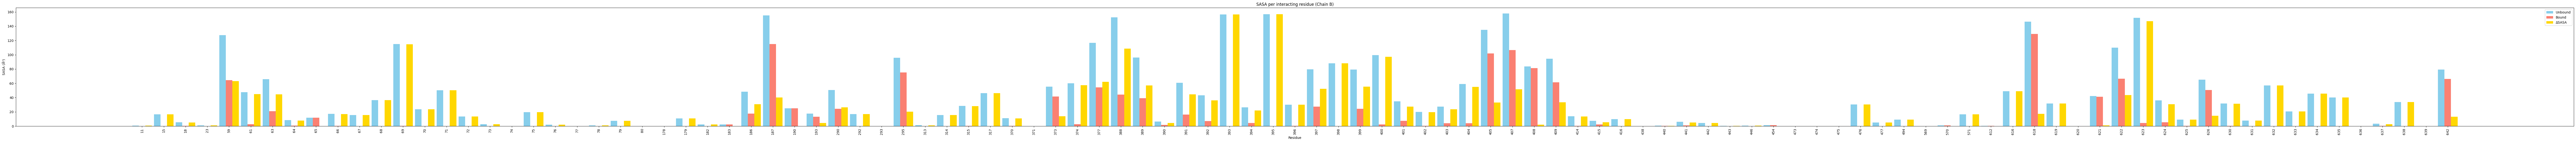

In [339]:
import freesasa
from Bio.PDB import PDBParser, PDBIO, Select
import matplotlib.pyplot as plt
import numpy as np
import tempfile

# Custom Select class to keep only one chain
class ChainSelect(Select):
    def __init__(self, chain_id):
        self.chain_id = chain_id
    def accept_chain(self, chain):
        return chain.get_id() == self.chain_id

def get_sasa(df, pdb_complex, chains):
    protein_chain = chains[1]  # e.g., 'M'
    
    # Calculate SASA for the entire complex
    structure = freesasa.Structure(pdb_complex)
    result = freesasa.calc(structure)
    print(f"Total SASA (complex): {result.totalArea():.2f} Å²")
    
    # Parse the complex PDB using Biopython
    parser = PDBParser(QUIET=True)
    struct_bio = parser.get_structure("complex", pdb_complex)
    
    # Save protein chain (unbound) to temporary file
    io = PDBIO()
    io.set_structure(struct_bio)
    with tempfile.NamedTemporaryFile(suffix=".pdb", delete=False) as tmp:
        chain_file = tmp.name
    io.save(chain_file, ChainSelect(protein_chain))
    
    # Calculate SASA for the isolated chain
    structure_unbound = freesasa.Structure(chain_file)
    result_unbound = freesasa.calc(structure_unbound)
    print(f"SASA of Chain {protein_chain} (unbound): {result_unbound.totalArea():.2f} Å²")
    
    # Extract residue numbers from the dataframe
    residue_ids = df.groupby(['end.auth_seq_id']).sum().index.tolist()  # residue numbers

    # Build selection queries for unbound chain
    queries_unbound = [f"res{res}, (resi {res} and chain {protein_chain})" for res in residue_ids]
    sasa_unbound = freesasa.selectArea(queries_unbound, structure_unbound, result_unbound)

    # Also compute SASA for the complex again to get bound values
    queries_bound = [f"res{res}, (resi {res} and chain {protein_chain})" for res in residue_ids]
    sasa_bound = freesasa.selectArea(queries_bound, structure, result)

    # ΔSASA = unbound - bound
    delta_sasa = {}
    for res in residue_ids:
        sasa_u = sasa_unbound.get(f"res{res}", 0)
        sasa_b = sasa_bound.get(f"res{res}", 0)
        delta = sasa_u - sasa_b
        delta_sasa[res] = delta
        print(f"Residue {res}: ΔSASA = {delta:.2f} Å²")

    # Plotting
    x = np.arange(len(residue_ids))
    width = 0.3
    unbound_vals = [sasa_unbound.get(f"res{res}", 0) for res in residue_ids]
    bound_vals = [sasa_bound.get(f"res{res}", 0) for res in residue_ids]
    delta_vals = [delta_sasa[res] for res in residue_ids]

    fig, ax = plt.subplots(figsize=(len(residue_ids), 6))
    ax.bar(x - width, unbound_vals, width, label="Unbound", color="skyblue")
    ax.bar(x, bound_vals, width, label="Bound", color="salmon")
    ax.bar(x + width, delta_vals, width, label="ΔSASA", color="gold")

    ax.set_xlabel("Residue")
    ax.set_ylabel("SASA (Å²)")
    ax.set_title(f"SASA per interacting residue (Chain {protein_chain})")
    ax.set_xticks(x)
    ax.set_xticklabels([str(r) for r in residue_ids], rotation=90)
    ax.legend()

    plt.tight_layout()
    plt.show()

get_sasa(df_chainAB, pdb_path, chains)


# analisis cercania Fenilalanina 153

In [ ]:
# un codigo que haga un diccionario donde salga la distancia en angstrom de todos los modelos generados, no solo los del cluster mayor donde salga la distancia desde la F153 al ligando 

import mdtraj as md
import glob
import numpy as np

pdb_files = sorted(glob.glob(relative_path))

# Cargar como trayectoria
traj = md.load(pdb_files, top=pdb_files[0])

# Superposición al primer modelo (para comparación RMSD)
traj.superpose(traj[0])